In [95]:
from ultralytics import YOLO
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import mimetypes

In [96]:
path = "../MasktoYOLO/yolo_model/coco_polyp.pt"

In [97]:
def test_model():
    # Check if GPU is available and set the device
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device}")

    model = YOLO(f"{path}")

    source = "test_images/images"

    results = model.predict(source, save_txt=True, save=True)

    for r in results:
        print(r.boxes)

In [98]:
if __name__=="__main__":
    test_model()

Using device: cuda
image 1/10 C:\Users\fvazq\PycharmProjects\MasktoYOLO\test_images\images\0.jpg: 640x640 1 polyp, 12.9ms
image 2/10 C:\Users\fvazq\PycharmProjects\MasktoYOLO\test_images\images\1.jpg: 640x640 (no detections), 15.7ms
image 3/10 C:\Users\fvazq\PycharmProjects\MasktoYOLO\test_images\images\2.jpg: 640x640 1 polyp, 15.2ms
image 4/10 C:\Users\fvazq\PycharmProjects\MasktoYOLO\test_images\images\3.jpg: 640x640 1 polyp, 13.7ms
image 5/10 C:\Users\fvazq\PycharmProjects\MasktoYOLO\test_images\images\4.jpg: 640x640 1 polyp, 14.3ms
image 6/10 C:\Users\fvazq\PycharmProjects\MasktoYOLO\test_images\images\5.jpg: 640x640 2 polyps, 14.2ms
image 7/10 C:\Users\fvazq\PycharmProjects\MasktoYOLO\test_images\images\6.jpg: 640x640 1 polyp, 14.1ms
image 8/10 C:\Users\fvazq\PycharmProjects\MasktoYOLO\test_images\images\7.jpg: 640x640 1 polyp, 14.2ms
image 9/10 C:\Users\fvazq\PycharmProjects\MasktoYOLO\test_images\images\8.jpg: 640x640 1 polyp, 12.9ms
image 10/10 C:\Users\fvazq\PycharmProjects\Ma

In [99]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2)) 

In [100]:
# Define the base directory where the results are saved
base_dir = "runs/detect"

# Get a list of all subdirectories in the base directory
sub_dirs = [os.path.join(base_dir, d) for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# Sort the subdirectories by creation time
sub_dirs.sort(key=lambda x: os.path.getmtime(x), reverse=True)

# The first subdirectory in the sorted list is the latest directory
latest_dir = sub_dirs[0]

# Define the subdirectory where the .txt files are saved
sub_dir = "labels"

# Construct the full path to the .txt files
txt_files_path = os.path.join(latest_dir, sub_dir)

    
print(txt_files_path)

runs/detect\predict10\labels


In [101]:
# Check if the directory exists
if os.path.isdir(txt_files_path):
    # Get a list of all files in the directory
    txt_files = sorted(os.listdir(txt_files_path))
    print(txt_files)
else:
    print(f"The directory {txt_files_path} does not exist.")

['0.txt', '2.txt', '3.txt', '4.txt', '5.txt', '6.txt', '7.txt', '8.txt', '9.txt']


In [102]:
# Iterate over the sorted lists
labels = []
order = []

for filename in txt_files:
    print(filename)
    
    # Get the number from file name
    current = (int(filename.split('.')[0]))

    # Check if the file is a txt file
    mime_type, _ = mimetypes.guess_type(filename)
    if mime_type in ['text/plain']:
        # print('It is a text file')
        
        # Construct the full path to the file
        full_path = os.path.join(txt_files_path, filename)
        print(full_path)

        # Get class_id from the id file
        with open(full_path, 'r') as f:
            lines = f.readlines()
            print(lines)

        # Get the annotations from the annotation file
        for line in lines:
            other_parts = line.split()
            annotations = other_parts[1:]
            labels.append(annotations)
            order.append(current)

0.txt
runs/detect\predict10\labels\0.txt
['0 0.469083 0.749971 0.387808 0.44712\n']
2.txt
runs/detect\predict10\labels\2.txt
['0 0.710072 0.486594 0.450136 0.844837\n']
3.txt
runs/detect\predict10\labels\3.txt
['0 0.374875 0.402853 0.29125 0.364993\n']
4.txt
runs/detect\predict10\labels\4.txt
['0 0.16984 0.722892 0.212004 0.326493\n']
5.txt
runs/detect\predict10\labels\5.txt
['0 0.381652 0.593264 0.28918 0.265194\n', '0 0.707351 0.40876 0.116821 0.156723\n']
6.txt
runs/detect\predict10\labels\6.txt
['0 0.547126 0.440649 0.149596 0.147821\n']
7.txt
runs/detect\predict10\labels\7.txt
['0 0.553904 0.593227 0.390274 0.316148\n']
8.txt
runs/detect\predict10\labels\8.txt
['0 0.556211 0.677501 0.453543 0.57476\n']
9.txt
runs/detect\predict10\labels\9.txt
['0 0.613536 0.508276 0.389545 0.646717\n']


In [103]:
print(labels)
print(order)

[['0.469083', '0.749971', '0.387808', '0.44712'], ['0.710072', '0.486594', '0.450136', '0.844837'], ['0.374875', '0.402853', '0.29125', '0.364993'], ['0.16984', '0.722892', '0.212004', '0.326493'], ['0.381652', '0.593264', '0.28918', '0.265194'], ['0.707351', '0.40876', '0.116821', '0.156723'], ['0.547126', '0.440649', '0.149596', '0.147821'], ['0.553904', '0.593227', '0.390274', '0.316148'], ['0.556211', '0.677501', '0.453543', '0.57476'], ['0.613536', '0.508276', '0.389545', '0.646717']]
[0, 2, 3, 4, 5, 5, 6, 7, 8, 9]


In [104]:
import os
import cv2
import matplotlib.pyplot as plt

def display_and_convert_images(path):
    # Get a list of all files in the directory
    files = os.listdir(path)

    # Determine the number of images
    num_images = len(files)

    # Determine subplot size
    num_cols = 4
    if (num_images + 1) % num_cols == 0:
        num_rows = (num_images + 1) // num_cols
    else:
        num_rows = (num_images + 1) // num_cols + 1

    # Create a new figure
    plt.figure(figsize=(10 * num_cols, 10 * num_rows))

    images = []
    images_paths = []

    # Iterate over all files in the directory
    for i, filename in enumerate(files, start=1):
        # Construct the full path to the image file
        image_path = os.path.join(path, filename)

        # Read the image
        image = cv2.imread(image_path)

        # Convert the image from BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Add a subplot for the current image
        plt.subplot(num_rows, num_cols, i)

        # Display the image
        plt.imshow(image)
        plt.axis('off')
        images.append(image)
        images_paths.append(filename)
        

    # Show all images
    plt.show()

    return images, images_paths

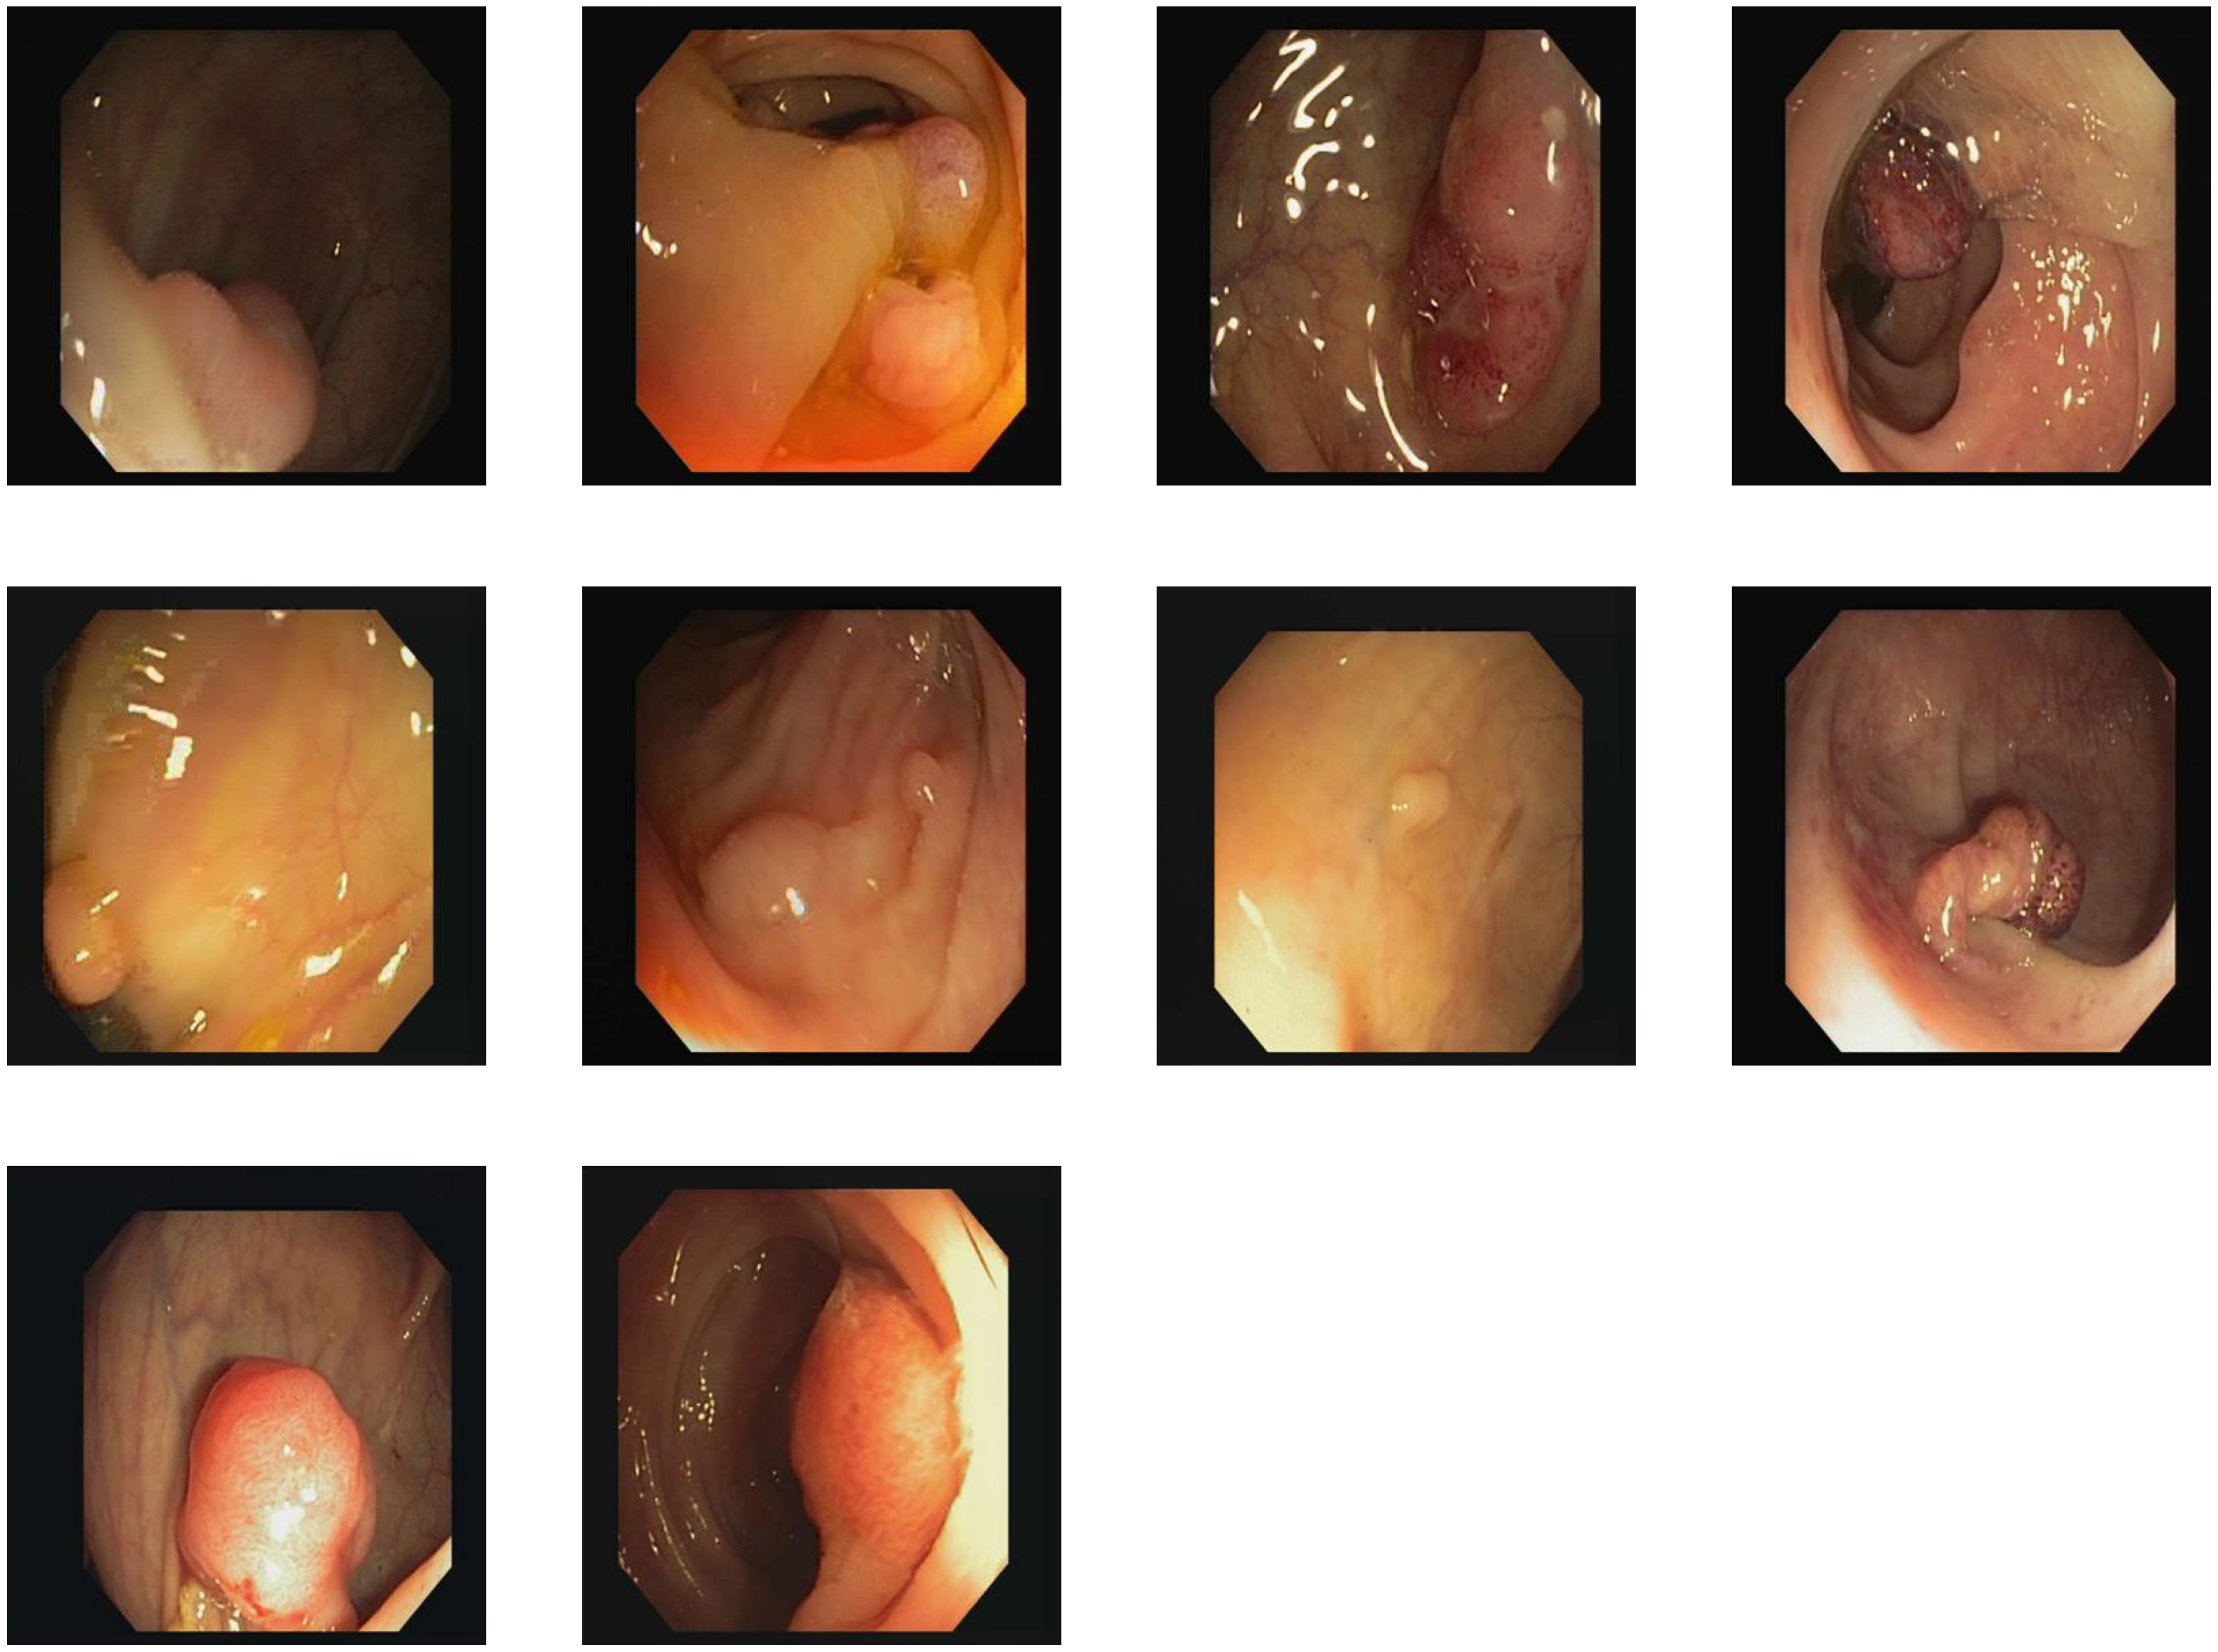

In [47]:
path = "test_images/images/"
images, images_paths = display_and_convert_images(path)

In [136]:
def convert_bboxes(bboxes, image_height, image_width):

    input_boxes = []
    input_points = []
    
    for bbox in bboxes:
        # Extract the normalized bounding box values
        x_center, y_center, box_width, box_height = bbox
    
        # Unnormalize the values to get pixel coordinates
        x_center = x_center * image_width
        y_center = y_center * image_height
        box_width = box_width * image_width
        box_height = box_height * image_height
    
        # Calculate the top-left (x_min, y_min) and bottom-right (x_max, y_max) corners
        x_min = x_center - (box_width / 2)
        y_min = y_center - (box_height / 2)
        x_max = x_center + (box_width / 2)
        y_max = y_center + (box_height / 2)
    
        # Append the converted bounding box to the list
        input_boxes.append([x_min, y_min, x_max, y_max])
        input_points.append([x_center, y_center])
    
        input_box = np.array(input_boxes)
        input_point = np.array(input_points)
        input_label = np.array([1]*len(input_boxes))
    


    return input_box, input_point, input_label

In [118]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "C:/Users/fvazq/OneDrive/Documents/PhD/SAM_research/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)


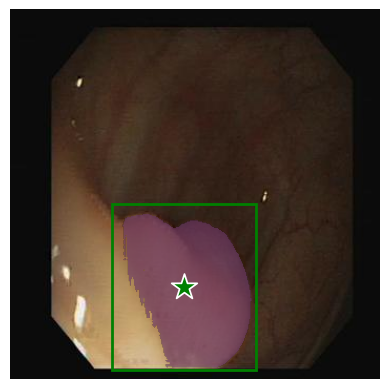

<Figure size 1000x1000 with 0 Axes>

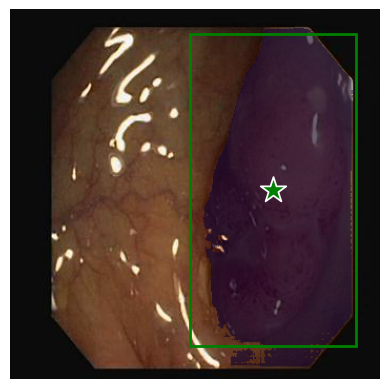

<Figure size 1000x1000 with 0 Axes>

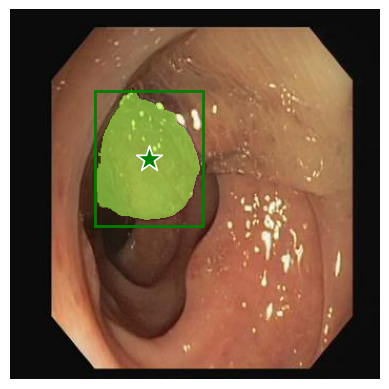

<Figure size 1000x1000 with 0 Axes>

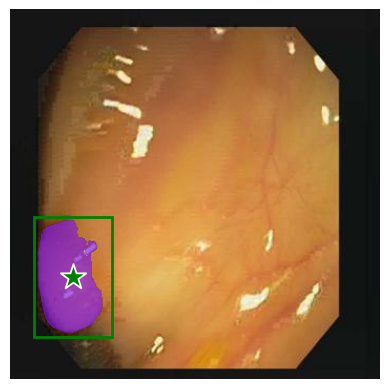

<Figure size 1000x1000 with 0 Axes>

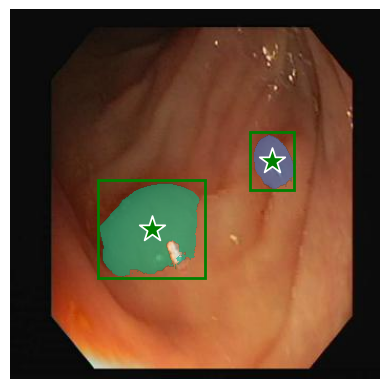

<Figure size 1000x1000 with 0 Axes>

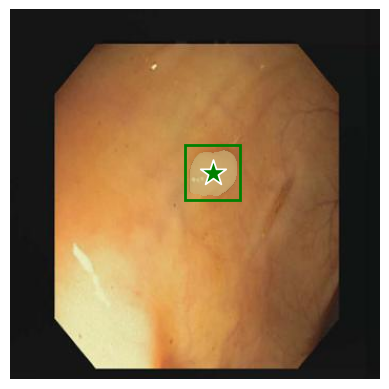

<Figure size 1000x1000 with 0 Axes>

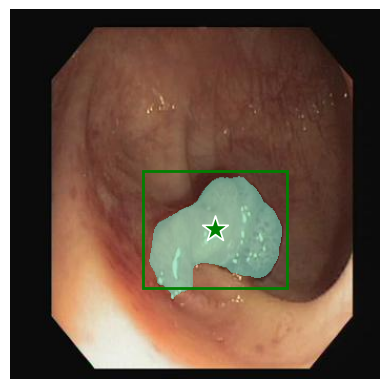

<Figure size 1000x1000 with 0 Axes>

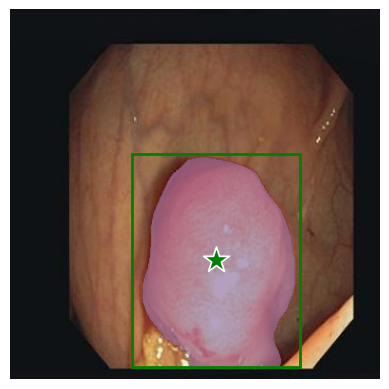

<Figure size 1000x1000 with 0 Axes>

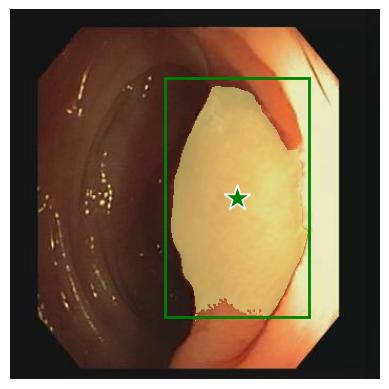

<Figure size 1000x1000 with 0 Axes>

In [159]:
# Convert string values to float
labels = [[float(coord) for coord in bbox] for bbox in labels]

i = 0

# Initialize a dictionary to collect bounding boxes per image
image_to_boxes = {}

# Iterate over images and order simultaneously
for idx in range(len(order)):
    current_idx = order[idx]
    
    # Get the number from file name
    filename = int(images_paths[current_idx].split('.')[0])
    
    # Get the labels for the current image
    image_labels = labels[i]
    
    # If the current image is already in the dictionary, append the new bounding box
    if current_idx in image_to_boxes:
        image_to_boxes[current_idx].append(image_labels)
    else:
        # Otherwise, create a new entry for this image
        image_to_boxes[current_idx] = [image_labels]
    
    # Move to the next label
    i += 1

# Now you have all bounding boxes for each image collected.
# Let's iterate over the images and process all bounding boxes at once
for idx, boxes in image_to_boxes.items():
    image = images[idx]

    # Assuming image_height and image_width are defined
    image_height, image_width, _ = image.shape
    
    # Convert all boxes for the current image
    input_boxes, input_points, input_labels = convert_bboxes(boxes, image_height, image_width)

    # Create masks and process the image with all bounding boxes
    predictor.set_image(image)
    
    # For multiple boxes
    ib = torch.tensor(input_boxes, device=predictor.device)
    
    transformed_boxes = predictor.transform.apply_boxes_torch(ib, image.shape[:2])
    
    masks, _, _ = predictor.predict_torch(
    point_coords=None,
    point_labels=None,
    boxes=transformed_boxes,
    multimask_output=False,
    )
    
    # Display the image
    plt.imshow(image)
    plt.axis('off')
    # show_mask(masks[0], plt.gca())
    for mask in masks:
        show_mask(mask.cpu().numpy(), plt.gca(), random_color=True)
    for box in ib:
        show_box(box.cpu().numpy(), plt.gca())
    #show_box(input_boxes, plt.gca())
    show_points(input_points, input_labels, plt.gca())
    plt.figure(figsize=(10,10))
    plt.show() 
    
    # print(f"Image index: {idx}")
    # print(f"Bounding Boxes: {input_boxes}")
    # print(f"Center Points: {input_points}")
    # print(ib)
